In [2]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\Korisnik\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Problem Statement:
Create a pie chart to show the proportion of job postings that mention health insurance for Data Analyst roles only:

Create a new DataFrame called df_DA that only gets Data Analyst roles.
Then count the number of data analyst roles that mention or not mention health insurance by using the job_health_insurance column.
Plot this using plt.pie(), setting labels parameter to ['No', 'Yes'], startangle to 90, and format values to display similarly to 23.1%.
Set the title to 'Proportion of Data Analyst Jobs Mentioning Health Insurance'.
Hint:
Use the plt.pie() function to create the pie chart and the value_counts() method to get the distribution of health insurance mentions.

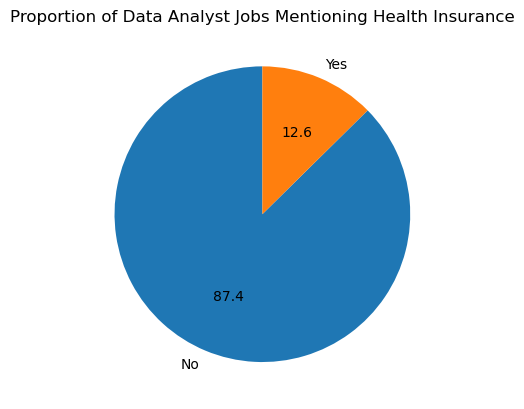

In [16]:
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()
df_DA_health = df_DA['job_health_insurance'].value_counts()

plt.pie(df_DA_health, startangle=90, labels=['No', 'Yes'], autopct='%1.1f')
plt.title('Proportion of Data Analyst Jobs Mentioning Health Insurance')
plt.show()

Problem Statement:
Create a pie chart showing the count of job postings per job schedule types (for only jobs that are either 'Full-time' and 'Part-time') in the DataFrame.
Create a DataFrame to filter out these job_schedule_type called df_ft_pt.
Plot this using plt.pie(), setting labels parameter to the index, startangle to 90, and format values to display similarly to 23.1%.
Add a title 'Job Schedule Full-time vs. Part-time'.
Hint:
Use the plt.pie() function to create the pie chart and plt.title() to add the title.

In [21]:
#df_jobs = df[(df['job_schedule_type'] == 'Full-time') | (df['job_schedule_type'] == 'Part-time')]
df_jobs = df[df['job_schedule_type'].isin(['Full-time','Part-time'])]
df_jobs_counts = df_jobs['job_schedule_type'].value_counts()
df_jobs_counts

job_schedule_type
Full-time    701727
Part-time      7881
Name: count, dtype: int64

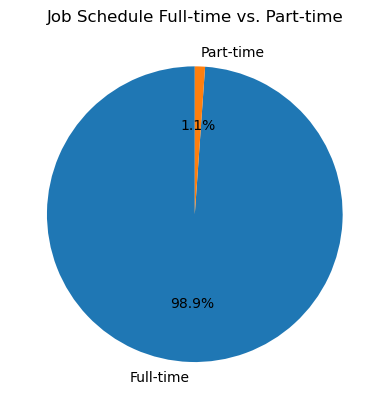

In [26]:
plt.pie(df_jobs_counts, startangle=90, autopct='%1.1f%%', labels=df_jobs_counts.index)
plt.title('Job Schedule Full-time vs. Part-time')
plt.show()

Problem Statement:
Create a pie chart to show the distribution of job postings that mention a degree in the job posting versus those that do not.

Only get job postings located in the US, create a new DataFrame with this filtered data called df_US.
Use the job_no_degree_mention column for this purpose.

Customize the pie chart by exploding the slice for jobs that do not mention a degree. (Use the explode parameter set to (0, 0.1) inside of plt.pie())

Set the chart title as 'Distribution of Jobs Mentioning Degrees for US Job Postings'.

Hint:
Use the plt.pie() function to create the pie chart and the value_counts() method to get the distribution of degree requirements for US jobs. Use the explode parameter to highlight the slice for jobs that do not require a degree.

In [35]:
df_US = df[df['job_country'] == 'United States']
df_US_degrees = df_US['job_no_degree_mention'].value_counts()
df_US_degrees

job_no_degree_mention
False    169655
True      36637
Name: count, dtype: int64

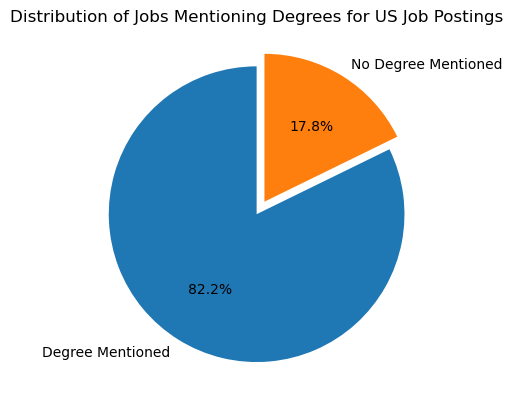

In [46]:
plt.pie(df_US_degrees, autopct='%1.1f%%', startangle=90, explode=(0, 0.1), labels=['Degree Mentioned', 'No Degree Mentioned'])
plt.title('Distribution of Jobs Mentioning Degrees for US Job Postings')
plt.show()